In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file_path = "data/block3.csv"
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])

In [5]:
bitcoin_train_df = bitcoin_df.iloc[:361]
bitcoin_train_df

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
356,2021-11-30,57828.45
357,2021-12-01,57025.79
358,2021-12-02,57229.76
359,2021-12-03,56508.48


In [6]:
bitcoin_train_df.shape

(361, 2)

In [8]:
bitcoin_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     361 non-null    object 
 1   price   361 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [9]:
bitcoin_train_df['day'] = pd.to_datetime(bitcoin_train_df['day'])
bitcoin_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     361 non-null    datetime64[ns]
 1   price   361 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


C:\Users\TS17EF~1.SBY\AppData\Local\Temp/ipykernel_2188/896602734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_train_df['day'] = pd.to_datetime(bitcoin_train_df['day'])


In [10]:
bitcoin_train_df.set_index('day', inplace=True)
bitcoin_train_df

,price
day,
2020-12-09,18318.87
2020-12-10,18554.15
2020-12-11,18247.76
2020-12-12,18029.36
2020-12-13,18803.44
...,...
2021-11-30,57828.45
2021-12-01,57025.79
2021-12-02,57229.76


<AxesSubplot:xlabel='day'>

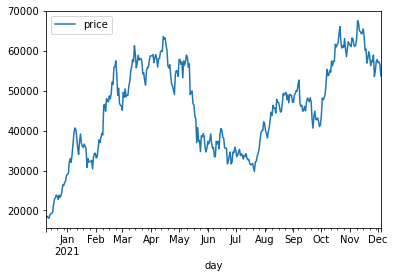

In [11]:
bitcoin_train_df.plot()

## ARIMA 모델 = AR + I + MA
- AR : AutoRegression, 이전데이터들에서 학습한 내용을 가지고 예측
- MA : MovingAverage, 이전데이터들의 오차를 반영해서 예측
- I  : Defference, 차이

### Additive 모델 = ARIMA  + 기간의 trend(경향성) : facebook

In [12]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [13]:
# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(bitcoin_train_df.price.values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

C:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  360
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3226.094
Method:                       css-mle   S.D. of innovations           1876.869
Date:                Fri, 10 Dec 2021   AIC                           6464.187
Time:                        10:23:08   BIC                           6487.504
Sample:                             1   HQIC                          6473.458
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.3228    103.092      0.954      0.340    -103.734     300.380
ar.L1.D.y      1.3617      0.025     54.663      0.000       1.313       1.410
ar.L2.D.y     -0.9466      0.021    -44.731      0.0

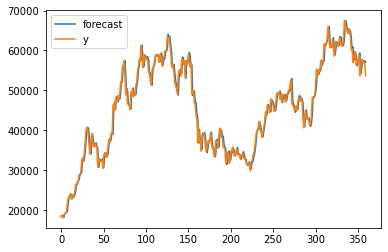

In [16]:
# 학습 데이터에 대한 예측 결과
fig = model_fit.plot_predict()

<AxesSubplot:>

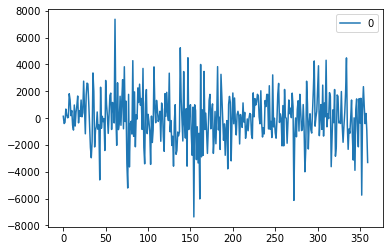

In [17]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

In [30]:
forecast_data = model_fit.forecast(steps=5)
forecast_data

(array([54320.83738927, 54543.7260594 , 54330.14705095, 53885.84425584,
        53540.53821699]),
 array([1876.86890993, 2616.61290757, 3204.72170672, 3745.14425676,
        4260.78336266]),
 array([[50642.2419221 , 57999.43285644],
        [49415.25899907, 59672.19311973],
        [48049.00792531, 60611.2861766 ],
        [46545.49639568, 61226.19211599],
        [45189.55628025, 61891.52015373]]))

In [23]:
bitcoin_test_df = bitcoin_df[361:]
bitcoin_test_df

,day,price
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41
365,2021-12-09,50511.12


In [31]:
pred_y = forecast_data[0]
pred_y

array([54320.83738927, 54543.7260594 , 54330.14705095, 53885.84425584,
       53540.53821699])

In [ ]:
pred_y = forcast_data[0]
pred_y

In [28]:
bitcoin_test_df.price

361    49253.86
362    49380.43
363    50564.63
364    50645.41
365    50511.12
Name: price, dtype: float64

In [29]:
bitcoin_test_df.price.values

array([49253.86, 49380.43, 50564.63, 50645.41, 50511.12])

In [33]:
forecast_data[2]  # 최저[0], 최고[1] => 그래프로!   ====> 2. dataset 의 양을 3년 이상으로 늘려보자.!

array([[50642.2419221 , 57999.43285644],
       [49415.25899907, 59672.19311973],
       [48049.00792531, 60611.2861766 ],
       [46545.49639568, 61226.19211599],
       [45189.55628025, 61891.52015373]])

In [35]:
pred_y = forecast_data[0].tolist()   # 마지막 5일 예측데이터

In [36]:
test_y = bitcoin_test_df.price.values   # 실제 5일 데이터

In [37]:
pred_y_lower = []  # 마지막 5일의 예측 데이터 최소값
pred_y_upper = []  # 마지막 5일의 예측 데이터 최대값

In [39]:
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

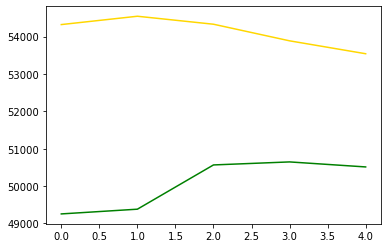

In [41]:
plt.plot(pred_y, color = 'gold') # 모델이 예측한 가격
plt.plot(test_y, color = 'green') # 실제가격

In [42]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'